In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
excel_file = "nbac_summarystats_1972_2023_20240530.xlsx"

df = pd.read_excel(excel_file, sheet_name='nbac_1972_2023_20240530')

# drop the first 3 rows and make the 4th row header
df.columns = df.iloc[3]
df = df.drop(index=[0, 1, 2, 3])
df = df.reset_index(drop=True)

# Convert columns to appropriate types
df['YEAR'] = df['YEAR'].astype(int)
df['ADJ_HA'] = df['ADJ_HA'].astype(float)

# make a column for before and after 2006
df['before_after_2006'] = df['YEAR'].apply(lambda x: 'before' if x <= 2006 else 'after')

# exclude all ADJ_HA values that are less than 100
df = df[df['ADJ_HA'] >= 100]


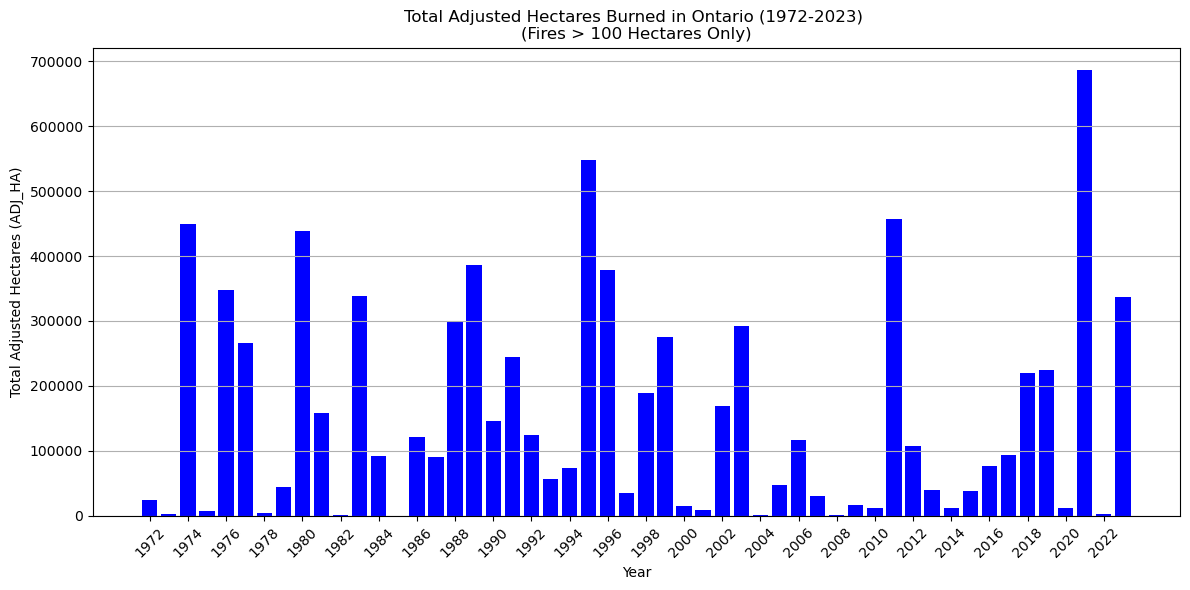

In [4]:
# select only rows with ADMIN_AREA == ON
df_on = df[df['ADMIN_AREA'] == 'ON'].copy()

# sum up the ADJ_HA values for each year
df_on_yearly = df_on.groupby('YEAR')['ADJ_HA'].sum().reset_index()

# graph the data
plt.figure(figsize=(12, 6))
plt.bar(df_on_yearly['YEAR'], df_on_yearly['ADJ_HA'], color='blue')
plt.title('Total Adjusted Hectares Burned in Ontario (1972-2023) \n(Fires > 100 Hectares Only)')
plt.xlabel('Year')
plt.ylabel('Total Adjusted Hectares (ADJ_HA)')
plt.xticks(np.arange(1972, 2024, 2), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

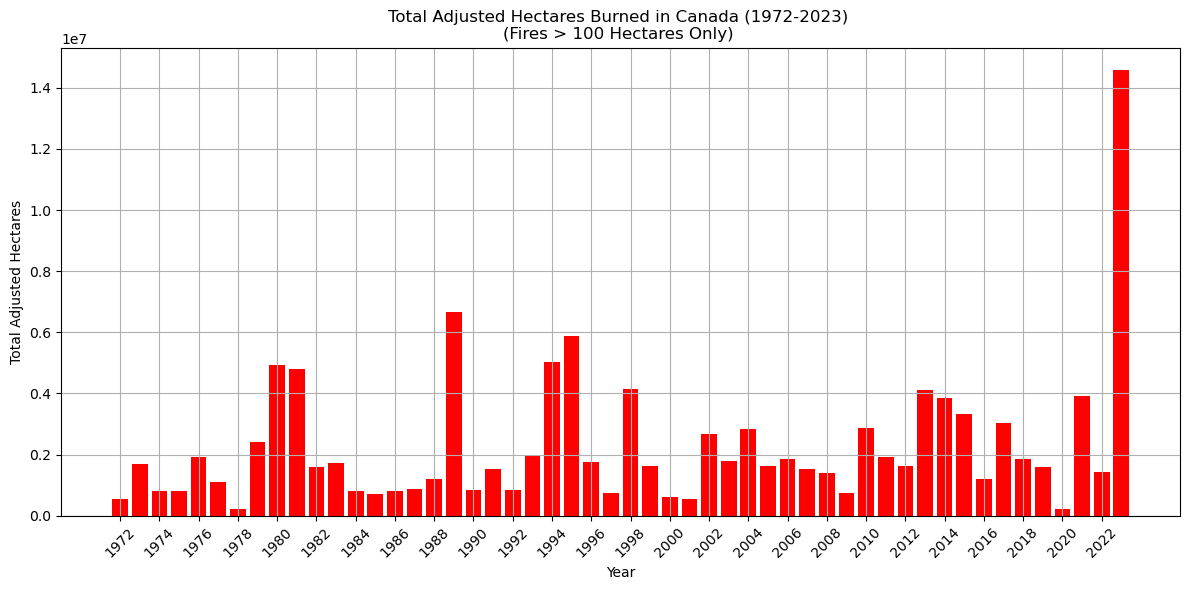

In [16]:
# sum up the data for each year in total and graph it 
df_total_yearly = df.groupby('YEAR')['ADJ_HA'].sum().reset_index()
# graph the total data
plt.figure(figsize=(12, 6))
plt.bar(df_total_yearly['YEAR'], df_total_yearly['ADJ_HA'], color='red')
plt.title('Total Adjusted Hectares Burned in Canada (1972-2023) \n(Fires > 100 Hectares Only) ')
plt.xlabel('Year')
plt.ylabel('Total Adjusted Hectares')
plt.xticks(np.arange(1972, 2024, 2), rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


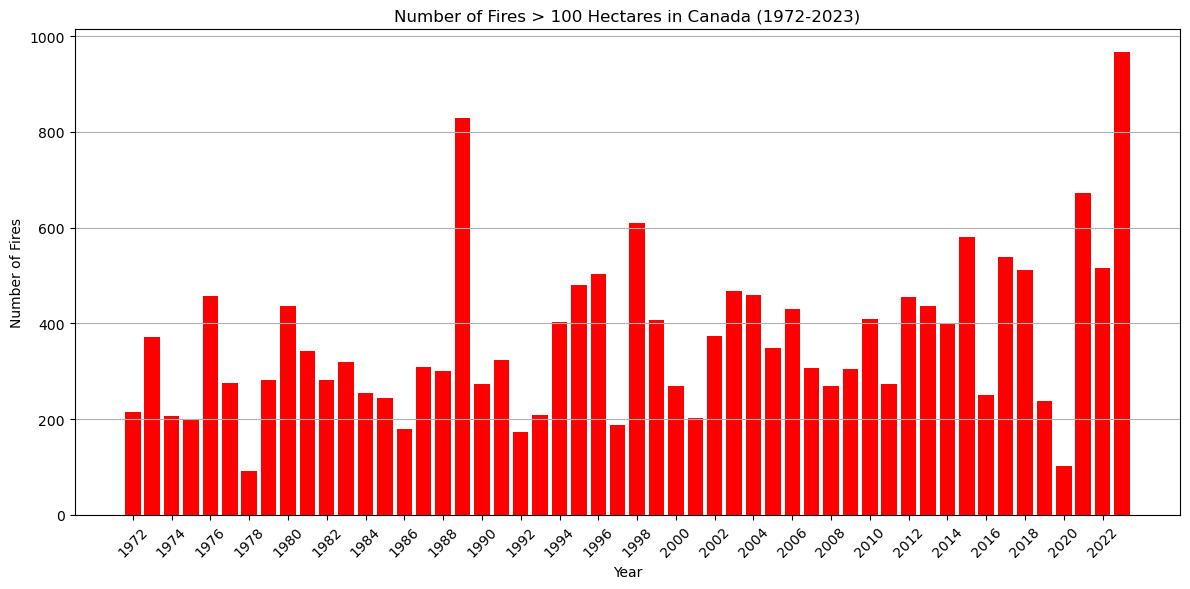

In [30]:
# Number of fires per year (Fires > 100 Hectares Only)
df_fire_count = df.groupby('YEAR').size().reset_index(name='fire_count')

plt.figure(figsize=(12, 6))
plt.bar(df_fire_count['YEAR'], df_fire_count['fire_count'], color='red')
plt.title('Number of Fires > 100 Hectares in Canada (1972-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(np.arange(1972, 2024, 2), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

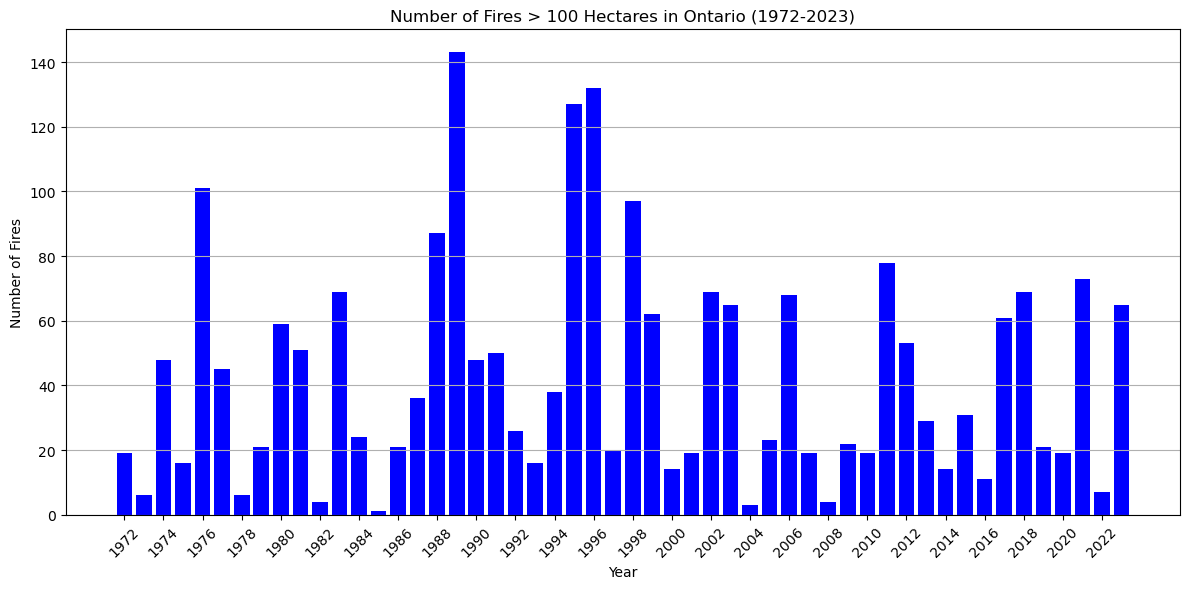

In [31]:
# Number of fires per year (Fires > 100 Hectares Only)
df_fire_count_on = df_on.groupby('YEAR').size().reset_index(name='fire_count')

plt.figure(figsize=(12, 6))
plt.bar(df_fire_count_on['YEAR'], df_fire_count_on['fire_count'], color='blue')
plt.title('Number of Fires > 100 Hectares in Ontario (1972-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(np.arange(1972, 2024, 2), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

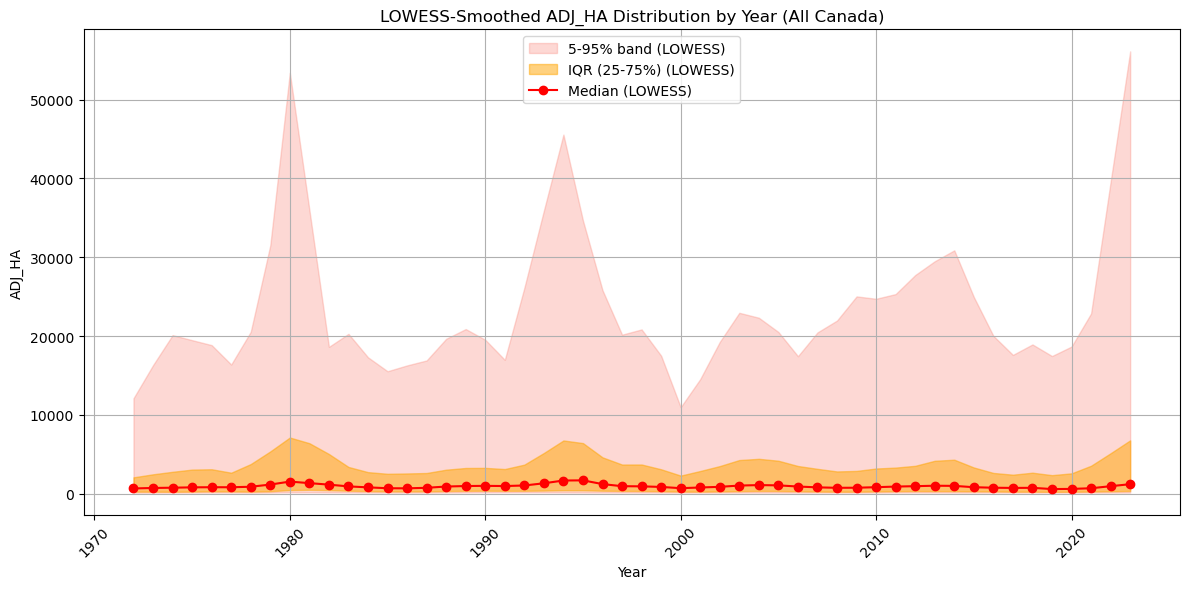

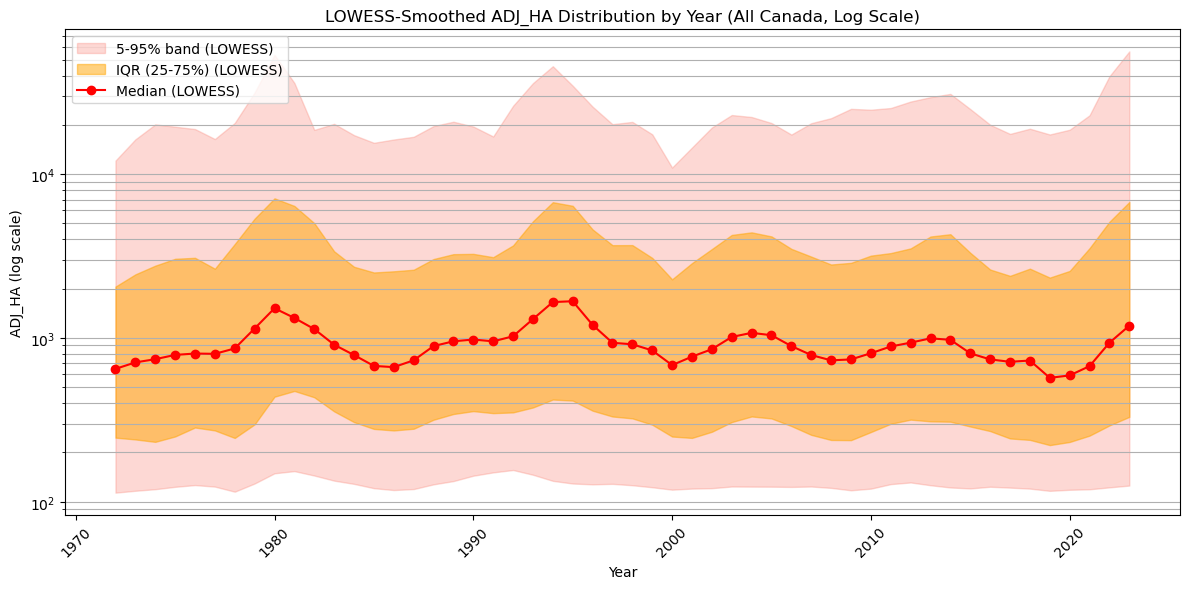

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Group by year and aggregate statistics for ADJ_HA
stats = df.groupby('YEAR')['ADJ_HA'].agg([
    ('median', 'median'),
    ('q25', lambda x: np.percentile(x, 25)),
    ('q75', lambda x: np.percentile(x, 75)),
    ('p5', lambda x: np.percentile(x, 5)),
    ('p95', lambda x: np.percentile(x, 95))
]).reset_index()

x = stats['YEAR'].values
lowess_smooth = {}
frac = 0.1  # Smoothing parameter

for col in ['median', 'q25', 'q75', 'p5', 'p95']:
    y = stats[col].values
    smoothed = lowess(y, x, frac=frac, return_sorted=False)
    lowess_smooth[col] = smoothed

plt.figure(figsize=(12, 6))
plt.fill_between(x, lowess_smooth['p5'], lowess_smooth['p95'], color='salmon', alpha=0.3, label='5-95% band (LOWESS)')
plt.fill_between(x, lowess_smooth['q25'], lowess_smooth['q75'], color='orange', alpha=0.5, label='IQR (25-75%) (LOWESS)')
plt.plot(x, lowess_smooth['median'], color='red', marker='o', label='Median (LOWESS)')
plt.title('LOWESS-Smoothed ADJ_HA Distribution by Year (All Canada)')
plt.xlabel('Year')
plt.ylabel('ADJ_HA')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# Log scale version
plt.figure(figsize=(12, 6))
plt.fill_between(x, lowess_smooth['p5'], lowess_smooth['p95'], color='salmon', alpha=0.3, label='5-95% band (LOWESS)')
plt.fill_between(x, lowess_smooth['q25'], lowess_smooth['q75'], color='orange', alpha=0.5, label='IQR (25-75%) (LOWESS)')
plt.plot(x, lowess_smooth['median'], color='red', marker='o', label='Median (LOWESS)')
plt.title('LOWESS-Smoothed ADJ_HA Distribution by Year (All Canada, Log Scale)')
plt.xlabel('Year')
plt.ylabel('ADJ_HA (log scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.legend()
plt.show()

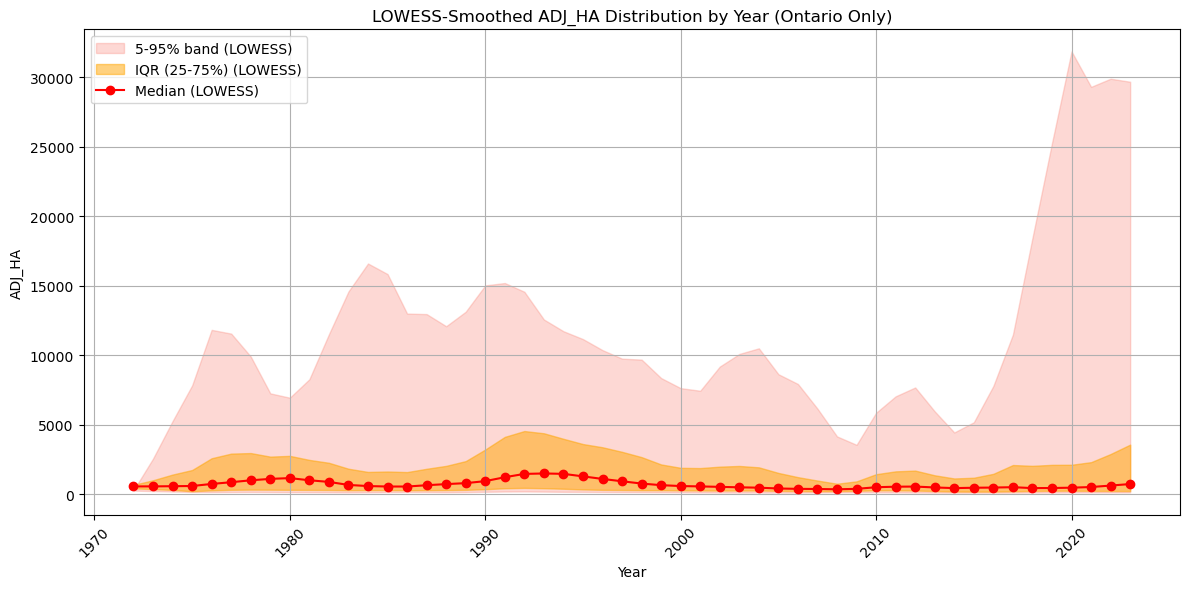

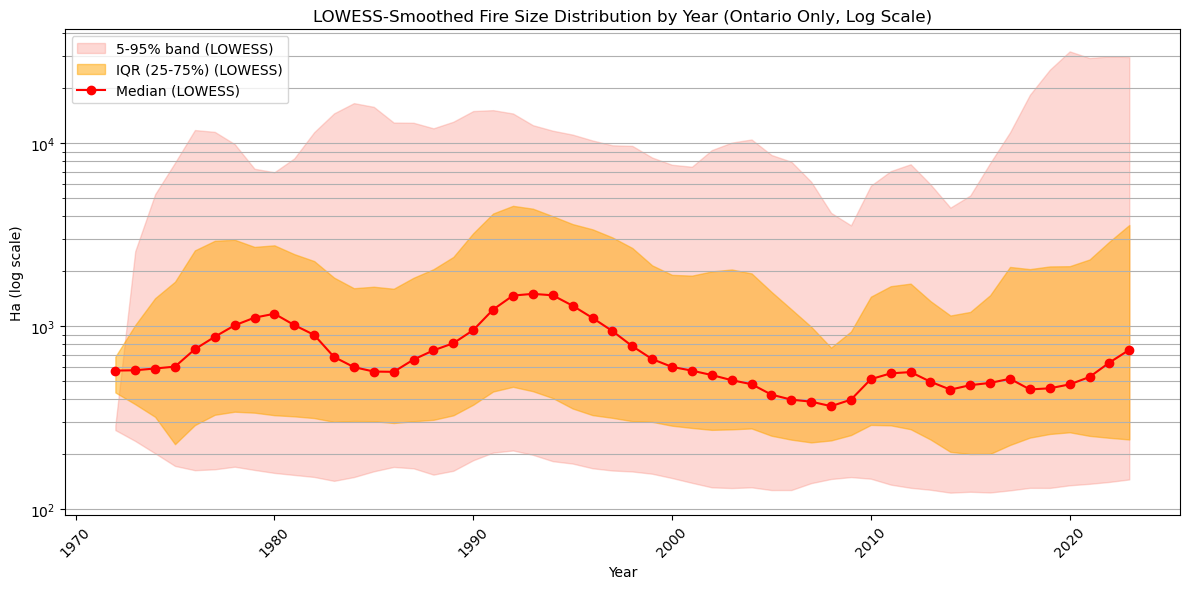

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Group by year and aggregate statistics for ADJ_HA in Ontario
stats_on = df_on.groupby('YEAR')['ADJ_HA'].agg([
    ('median', 'median'),
    ('q25', lambda x: np.percentile(x, 25)),
    ('q75', lambda x: np.percentile(x, 75)),
    ('p5', lambda x: np.percentile(x, 5)),
    ('p95', lambda x: np.percentile(x, 95))
]).reset_index()

x_on = stats_on['YEAR'].values
lowess_smooth_on = {}
frac = 0.15  # Smoothing parameter

for col in ['median', 'q25', 'q75', 'p5', 'p95']:
    y = stats_on[col].values
    smoothed = lowess(y, x_on, frac=frac, return_sorted=False)
    lowess_smooth_on[col] = smoothed

plt.figure(figsize=(12, 6))
plt.fill_between(x_on, lowess_smooth_on['p5'], lowess_smooth_on['p95'], color='salmon', alpha=0.3, label='5-95% band (LOWESS)')
plt.fill_between(x_on, lowess_smooth_on['q25'], lowess_smooth_on['q75'], color='orange', alpha=0.5, label='IQR (25-75%) (LOWESS)')
plt.plot(x_on, lowess_smooth_on['median'], color='red', marker='o', label='Median (LOWESS)')
plt.title('LOWESS-Smoothed ADJ_HA Distribution by Year (Ontario Only)')
plt.xlabel('Year')
plt.ylabel('ADJ_HA')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# Log scale version
plt.figure(figsize=(12, 6))
plt.fill_between(x_on, lowess_smooth_on['p5'], lowess_smooth_on['p95'], color='salmon', alpha=0.3, label='5-95% band (LOWESS)')
plt.fill_between(x_on, lowess_smooth_on['q25'], lowess_smooth_on['q75'], color='orange', alpha=0.5, label='IQR (25-75%) (LOWESS)')
plt.plot(x_on, lowess_smooth_on['median'], color='red', marker='o', label='Median (LOWESS)')
plt.title('LOWESS-Smoothed Fire Size Distribution by Year (Ontario Only, Log Scale)')
plt.xlabel('Year')
plt.ylabel('Ha (log scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.legend()
plt.show()